<a href="https://colab.research.google.com/github/RafaBessa/Learning_NeuralNets/blob/master/HandwrittenClassifierMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link seguido - https://medium.com/@mjbhobe/mnist-digits-classification-with-keras-ed6c2374bd0e


In [0]:
#from numpy import loadtxt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import  Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from google.colab import files
import numpy as np
#import io
import matplotlib.pyplot as plt
%matplotlib inline 
#import pandas as pd
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

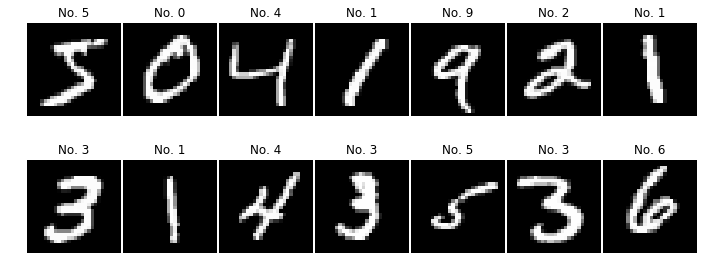

In [124]:

#Getting data
(x_train, y_train), (x_test, y_test)= mnist.load_data()

#display numbers
sample_digits = x_train[0:14]
sample_labels = y_train[0:14]

rows = 2
cols=7
f, ax = plt.subplots(rows,cols,figsize=(12,5),
                     gridspec_kw={"wspace":0.03,'hspace':0.01},
                    squeeze = True)

for r in range(rows):
  for c in range(cols):
    image_index = r*7+c
    ax[r,c].axis('off')
    ax[r,c].imshow(sample_digits[image_index],cmap='gray')
    ax[r,c].set_title('No. %d' %sample_labels[image_index])
plt.show()

In [128]:
#Reshaping Data
#shape(Num_samples,img_Height,img_width,num_channels)
print(x_train.shape)

img_height = x_train.shape[1]
img_width = x_train.shape[2]
num_channels = 1 #Numero de matriz que serao formados por imagem
                 #Como a imagem esta em preto e branco, temos uma matriz
                 #Caso img RGB, tem-se 3 channels, um para cada gradiente
    
x_train = np.reshape(x_train, (x_train.shape[0],img_height,img_width,num_channels))
x_test = np.reshape(x_test, (x_test.shape[0],img_height,img_width,num_channels))

print(x_train.shape)

#Re-scale para que os valores estejam entre 0-1
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

#transformar minhas saidas em vetor binario categorico
#https://keras.io/utils/#to_categorical
num_classes = 10
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

print(y_train.shape)
print(y_test.shape)
#separando o teste em teste e validacao
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.1)


(60000, 28, 28, 1)
(60000, 28, 28, 1)
(60000, 10)
(9000, 10)


In [129]:
#Define model
#conv2d -> forma de convolucionar imagens (CNN)
#MaxPooling2d -> comprime a imagem, dividindo ela em quadrantes, e gerando uma 
#nova imagem com o maior valor de cada quadrante

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(img_height, img_width,num_channels)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))    
model.add(Flatten())
# Densely connected layers
model.add(Dense(128, activation='relu'))
# output layer
model.add(Dense(num_classes, activation='softmax'))
#compiling model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [0]:
#treinando a rede
FitModel = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test, y_test))


Train on 60000 samples, validate on 8100 samples
Epoch 1/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0190 - acc: 0.9941 - val_loss: 0.0345 - val_acc: 0.9881
Epoch 2/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0172 - acc: 0.9944 - val_loss: 0.0392 - val_acc: 0.9890
Epoch 3/10
37376/60000 [=================>............] - ETA: 28s - loss: 0.0154 - acc: 0.9951

In [131]:
#evaluate the keras model

_, accuracy = model.evaluate(x_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

8100/8100 [==============================] - 3s 423us/step
Accuracy: 98.60


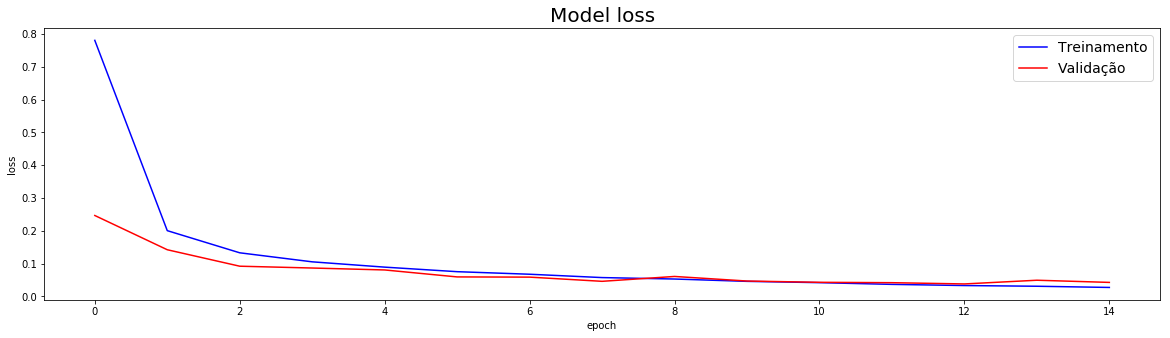

In [132]:
#print(FitModel.history)

plt.figure(figsize=(20, 5))
plt.plot(FitModel.history['loss'], color='blue')
plt.plot(FitModel.history['val_loss'], color='red')
plt.title('Model loss', fontsize=20)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Validação'], loc='upper right', fontsize=14)
plt.show()